In [1]:
import pandas as pd
from pysyncon import Dataprep, PenalizedSynth, AugSynth, RobustSynth, Synth
import random

In [28]:
treated_unit= '81959733'
treated_period = 2013
id_var = 'pidp'
time_var = 'year'
outcome_var = 'ind_inc_deflated'
df = pd.read_csv('./test_data.csv', index_col=0)
df['pidp'] = df['pidp'].astype(str)
t_u = df[df.pidp==treated_unit].copy()
c_u = df[df.pidp!=treated_unit].copy()
selection = random.sample(c_u.pidp.unique().tolist(), 1000)
sample = df[df.pidp.isin(selection)]
data = pd.concat([sample,t_u], axis=0)

In [29]:
df = pd.read_csv("./data/germany.csv")

dataprep = Dataprep(
    foo=data,
    predictors=['ind_inc_deflated', 'asian', 'black', 'dvage', 'low', 'mastat_recoded', 'middle', 'mixed', 'other'],
    predictors_op="mean",
    time_predictors_prior=range(2010, 2014),
    dependent="ind_inc_deflated",
    unit_variable="pidp",
    time_variable="year",
    treatment_identifier="81959733",
    controls_identifier=selection,
    time_optimize_ssr=range(2010, 2014),
)

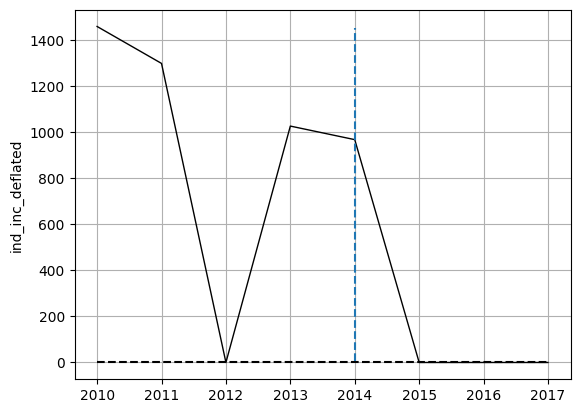

In [4]:
augsynth = AugSynth()
augsynth.fit(dataprep=dataprep)
augsynth.gaps_plot(time_period=range(2010, 2018), treatment_time=2014)

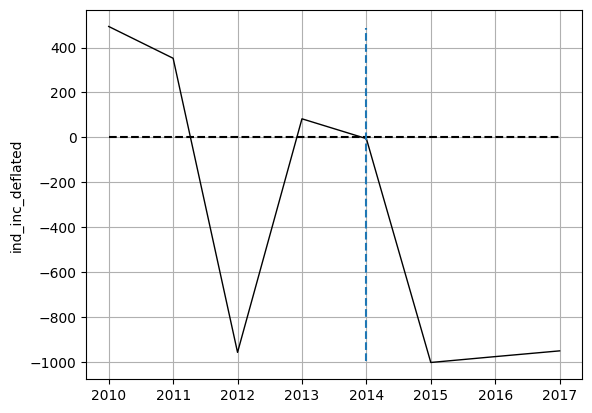

In [30]:
pen = PenalizedSynth()
pen.fit(dataprep, lambda_=0.01)
pen.gaps_plot(time_period=range(2010, 2018), treatment_time=2014)

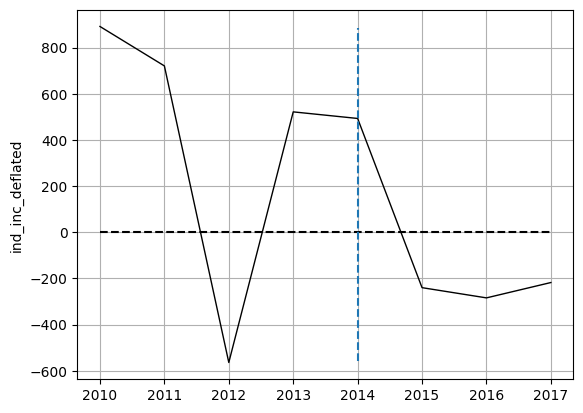

In [6]:
robust = RobustSynth()
robust.fit(dataprep, lambda_=0.1, sv_count=2)
robust.gaps_plot(time_period=range(2010, 2018), treatment_time=2014)

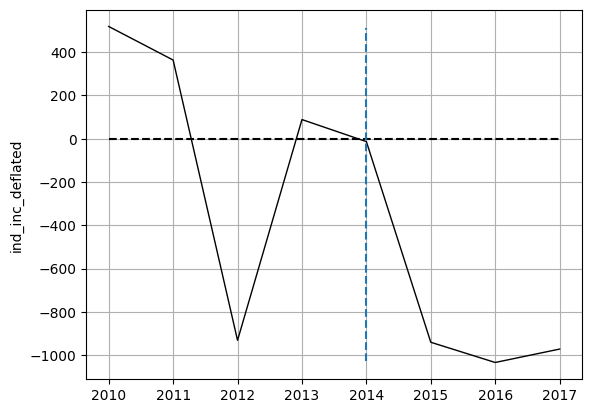

In [18]:
synth = Synth()
synth.fit(dataprep=dataprep, optim_method="Nelder-Mead", optim_initial="equal")
synth.gaps_plot(time_period=range(2010, 2018), treatment_time=2014)

In [31]:
pen.W

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001,